## 2 - CLUSTERS

### 1. LIBRERÍAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import os
import re
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np

### 2. DATOS

In [2]:
df_prepared = pd.read_csv('radiomica_limpia.csv')
print(df_prepared['Clinical_Type'].value_counts())
print(df_prepared.shape)

Clinical_Type
2    360
3     78
1     40
4     28
Name: count, dtype: int64
(506, 38)


In [3]:
df_original = pd.read_csv("/home/anna/TFM/Radiomica/NO SUPERVISADO/caracteristicas_radiomicas.csv")

In [4]:
df_filtered = df_prepared[df_prepared['Clinical_Type'].isin([2])].copy()
df_filtered.shape

(360, 38)

In [5]:
X = df_filtered.select_dtypes(include=['float64', 'int64']).drop(columns=['Clinical_Type'])

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)  

### 3. ANALISI CON 2 CLUSTERS

#### 3.0 SILHOUETTE COEFICIENTE PARA TODOS LOS MÉTODOS PARA K CLUSTERS

In [ ]:
K_range = range(2, 11)

silhouette_scores_dict = {
    "KMeans": [],
    "GMM": [],
    "Agglomerative": [],
    "Spectral": []
}

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores_dict["KMeans"].append(score)
    print(f"KMeans k={k}, Silhouette={score:.3f}")

for k in K_range:
    gmm = GaussianMixture(n_components=k, random_state=42, n_init=10)
    labels = gmm.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores_dict["GMM"].append(score)
    print(f"GMM k={k}, Silhouette={score:.3f}")


for k in K_range:
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores_dict["Agglomerative"].append(score)
    print(f"Agglomerative k={k}, Silhouette={score:.3f}")


for k in K_range:
    spectral = SpectralClustering(n_clusters=k, random_state=42, assign_labels="kmeans")
    labels = spectral.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores_dict["Spectral"].append(score)
    print(f"Spectral k={k}, Silhouette={score:.3f}")

plt.figure(figsize=(8,5))
for method, scores in silhouette_scores_dict.items():
    plt.plot(K_range, scores, marker='o', label=method)

plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid(True)
plt.savefig("silhouette_all_methods.png", dpi=300, bbox_inches="tight")
plt.show()


Y para cada uno de los métodos individualmente

In [ ]:

K_range = range(2, 11)

methods = ["KMeans", "GMM", "Agglomerative", "Spectral"]
silhouette_scores_dict = {method: [] for method in methods}

def plot_and_save(scores, method_name):
    plt.figure(figsize=(7,5))
    plt.plot(K_range, scores, marker='o')
    plt.title(f"Silhouette Score vs Number of Clusters ({method_name})")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.grid(True)
    filename = f"silhouette_{method_name.lower()}.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.close()
    print(f"Saved figure: {filename}")

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores_dict["KMeans"].append(score)
    print(f"KMeans k={k}, Silhouette={score:.3f}")
plot_and_save(silhouette_scores_dict["KMeans"], "KMeans")


for k in K_range:
    gmm = GaussianMixture(n_components=k, random_state=42, n_init=10)
    labels = gmm.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores_dict["GMM"].append(score)
    print(f"GMM k={k}, Silhouette={score:.3f}")
plot_and_save(silhouette_scores_dict["GMM"], "GMM")

for k in K_range:
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores_dict["Agglomerative"].append(score)
    print(f"Agglomerative k={k}, Silhouette={score:.3f}")
plot_and_save(silhouette_scores_dict["Agglomerative"], "Agglomerative")

for k in K_range:
    spectral = SpectralClustering(n_clusters=k, random_state=42, assign_labels="kmeans")
    labels = spectral.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores_dict["Spectral"].append(score)
    print(f"Spectral k={k}, Silhouette={score:.3f}")
plot_and_save(silhouette_scores_dict["Spectral"], "Spectral")

#### 3.1 K-MEANS

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
k = 2
model = KMeans(n_clusters=k, random_state=0)
labels = model.fit_predict(X)

df_filtered['Cluster'] = labels
print(df_filtered['Cluster'].value_counts())


Cluster
1    182
0    178
Name: count, dtype: int64


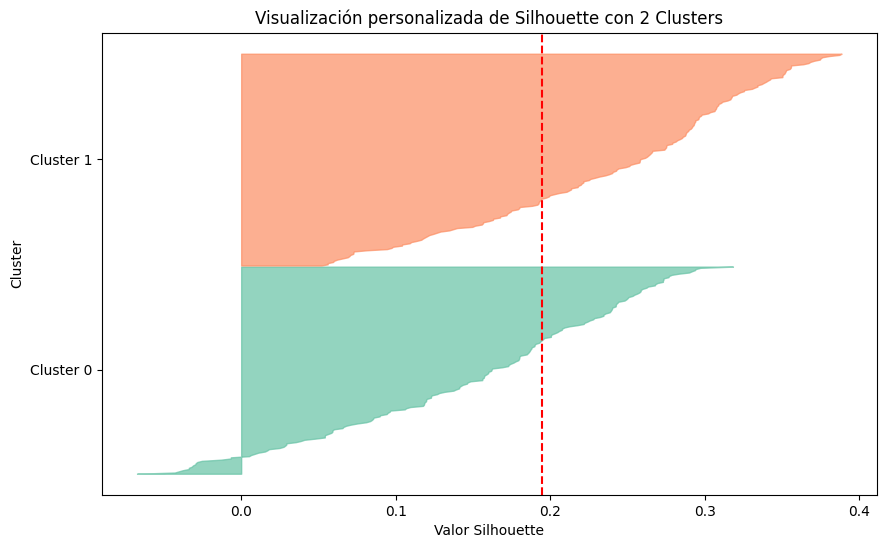

In [10]:
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(X, labels)
y_ticks = []
start = 0

plt.figure(figsize=(10,6))
for i in range(k):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    y_lower = start
    y_upper = start + len(cluster_silhouette_vals)
    color = sns.color_palette("Set2")[i]
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, color=color, alpha=0.7)
    y_ticks.append((y_lower + y_upper) / 2)
    start = y_upper

plt.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
plt.yticks(y_ticks, [f"Cluster {i}" for i in range(k)])
plt.xlabel("Valor Silhouette")
plt.ylabel("Cluster")
plt.title("Visualización personalizada de Silhouette con 2 Clusters")
plt.savefig("silhouette_Score_kmeans_2.png", dpi=300, bbox_inches="tight")
plt.show()

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

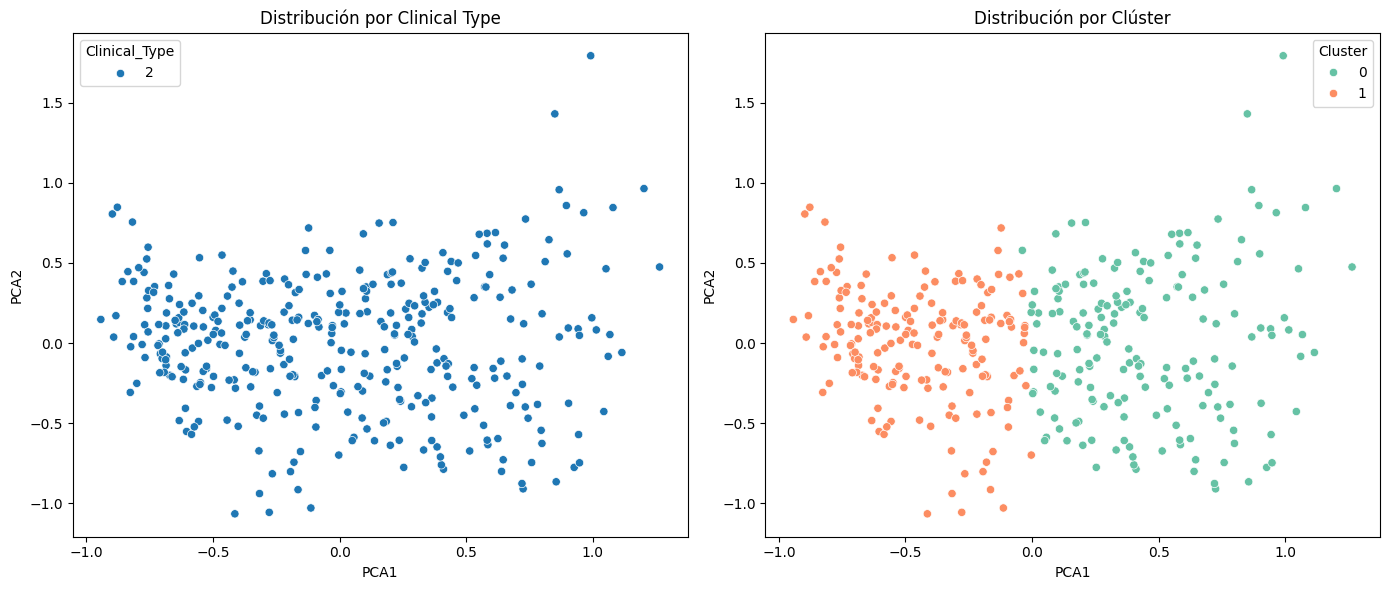

In [12]:
df_filtered['PCA1'] = X_pca[:, 0]
df_filtered['PCA2'] = X_pca[:, 1]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df_filtered, x='PCA1', y='PCA2', hue='Clinical_Type', palette='tab10', ax=axes[0])
axes[0].set_title('Distribución por Clinical Type')

sns.scatterplot(data=df_filtered, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', ax=axes[1])
axes[1].set_title('Distribución por Clúster')

plt.tight_layout()
plt.show()
my_plot = fig  
my_plot.savefig("grafica_clinical_vs_cluster_kmeans_2.png", dpi=300, bbox_inches="tight")

In [13]:
import pandas as pd

df_filtered = df_filtered.drop(columns=['PCA1','PCA2'], errors='ignore')

cluster_means = df_filtered.groupby('Cluster').mean()

print(cluster_means.T)  

Cluster                                          0             1
10Percentile                         -1.220852e+00 -6.050500e-01
90Percentile                          3.579096e-01  1.058297e+00
Energy                                4.872375e+05  2.653464e+05
Entropy                               7.380410e-01  8.871125e-01
InterquartileRange                    8.327003e-01  8.648112e-01
Kurtosis                              5.134977e+00  4.019448e+00
Maximum                               3.099287e+00  3.196064e+00
Mean                                 -4.328775e-01  2.297351e-01
Minimum                              -2.186436e+00 -1.843479e+00
Range                                 5.285723e+00  5.039544e+00
RootMeanSquared                       8.132813e-01  7.414324e-01
Skewness                              5.993028e-01  2.241346e-01
Elongation                            6.582700e-01  6.542733e-01
MajorAxisLength                       9.506283e+02  7.309989e+02
PerimeterSurfaceRatio    

In [14]:
from scipy.stats import f_oneway

features = df_filtered.columns.drop(['Cluster', 'PCA1', 'PCA2'], errors='ignore')
clusters = df_filtered['Cluster'].unique()

print("Variables con diferencias significativas (p < 0.05):")
for feature in features:
    groups = [df_filtered[df_filtered['Cluster'] == c][feature] for c in clusters]
    stat, p = f_oneway(*groups)
    if p < 0.05:
        print(f"{feature}: p-value = {p:.6f}")


Variables con diferencias significativas (p < 0.05):
10Percentile: p-value = 0.000000
90Percentile: p-value = 0.000000
Energy: p-value = 0.002434
Entropy: p-value = 0.000000
Kurtosis: p-value = 0.000006
Mean: p-value = 0.000000
Minimum: p-value = 0.000000
Range: p-value = 0.035704
RootMeanSquared: p-value = 0.000908
Skewness: p-value = 0.000000
MajorAxisLength: p-value = 0.007498
PerimeterSurfaceRatio: p-value = 0.011054
ClusterShade: p-value = 0.000000
Contrast: p-value = 0.000010
Imc2: p-value = 0.000004
GrayLevelNonUniformityNormalized: p-value = 0.000998
HighGrayLevelZoneEmphasis: p-value = 0.000000
LargeAreaEmphasis: p-value = 0.004915
LargeAreaLowGrayLevelEmphasis: p-value = 0.000011
SizeZoneNonUniformityNormalized: p-value = 0.000040
SmallAreaHighGrayLevelEmphasis: p-value = 0.000293
SmallAreaLowGrayLevelEmphasis: p-value = 0.000000
ZoneEntropy: p-value = 0.010636
GrayLevelNonUniformityNormalized.1: p-value = 0.000050
HighGrayLevelRunEmphasis: p-value = 0.000000
Busyness: p-valu

/home/anna/.pyenv/versions/venv_radiomica_py310/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


Top características por diferencia de medias entre clusters:
Index(['ClusterShade', 'SmallDependenceHighGrayLevelEmphasis', 'Mean',
       'HighGrayLevelZoneEmphasis', '90Percentile',
       'SmallDependenceLowGrayLevelEmphasis', '10Percentile', 'Entropy',
       'SmallAreaLowGrayLevelEmphasis', 'HighGrayLevelRunEmphasis'],
      dtype='object')


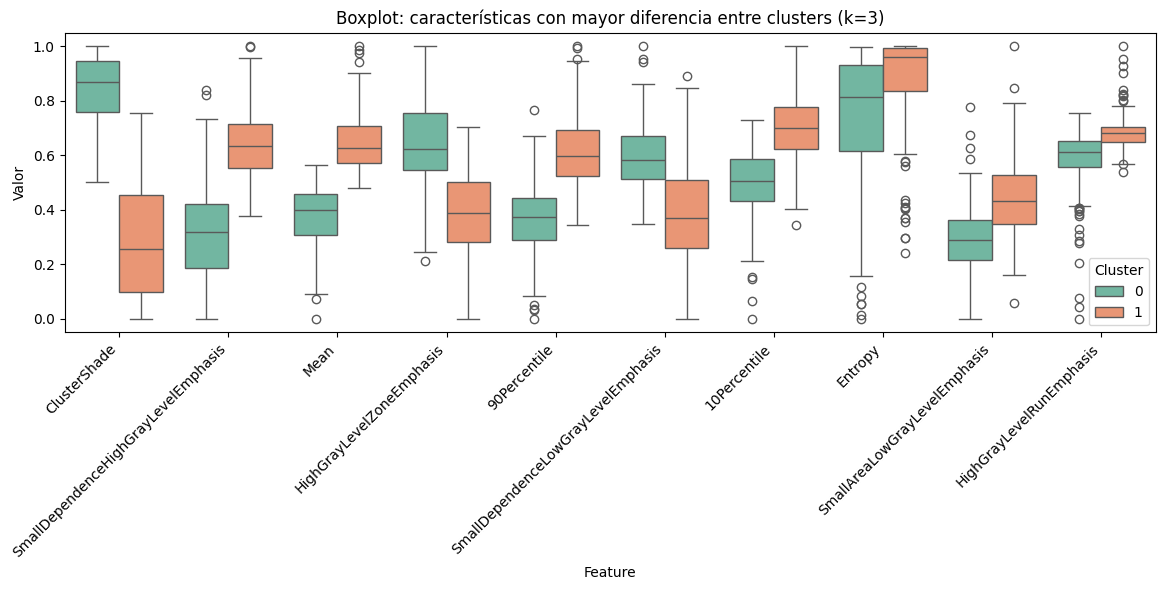

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = df_filtered.drop(columns=['Cluster', 'PCA1', 'PCA2'], errors='ignore')
y = df_filtered['Cluster']

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled['Cluster'] = y.values

cluster_means = X_scaled.groupby('Cluster').mean()
diff = cluster_means.max() - cluster_means.min()  

top_features = diff.sort_values(ascending=False).head(10).index

print("Top características por diferencia de medias entre clusters:")
print(top_features)

df_long = X_scaled.melt(id_vars='Cluster', value_vars=top_features, var_name='Feature', value_name='Valor')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_long, x='Feature', y='Valor', hue='Cluster', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot: características con mayor diferencia entre clusters (k=3)')
plt.tight_layout()
my_plot = fig  
my_plot.savefig("grafica_boxplot_kmeans_2.png", dpi=300, bbox_inches="tight")
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Top 10 características por importancia:")
for i in indices[:10]:
    print(f"{X.columns[i]}: {importances[i]:.4f}")


Top 10 características por importancia:
Mean: 0.2636
ClusterShade: 0.1861
SmallDependenceHighGrayLevelEmphasis: 0.1223
HighGrayLevelZoneEmphasis: 0.0574
90Percentile: 0.0519
10Percentile: 0.0505
SmallDependenceLowGrayLevelEmphasis: 0.0472
HighGrayLevelRunEmphasis: 0.0278
Entropy: 0.0239
SmallAreaLowGrayLevelEmphasis: 0.0176


In [17]:
df_filtered['10Percentile_round'] = df_filtered['10Percentile'].round(5)
df_original['10Percentile_round'] = df_original['10Percentile'].round(5)


In [18]:
df_merged = pd.merge(df_filtered, df_original[['10Percentile_round', 'Image', 'Mask']], 
                     on='10Percentile_round', how='left')

df_merged.drop(columns='10Percentile_round', inplace=True)


In [19]:
df_merged['FolderID'] = df_merged['Image']


Elegimos 4 imágenes al azar de cada cluster para ver si encontramos relación

Figura guardada: /home/anna/TFM/Radiomica/Visualizaciones_KMeans/KMeans_aleatorio_2.png


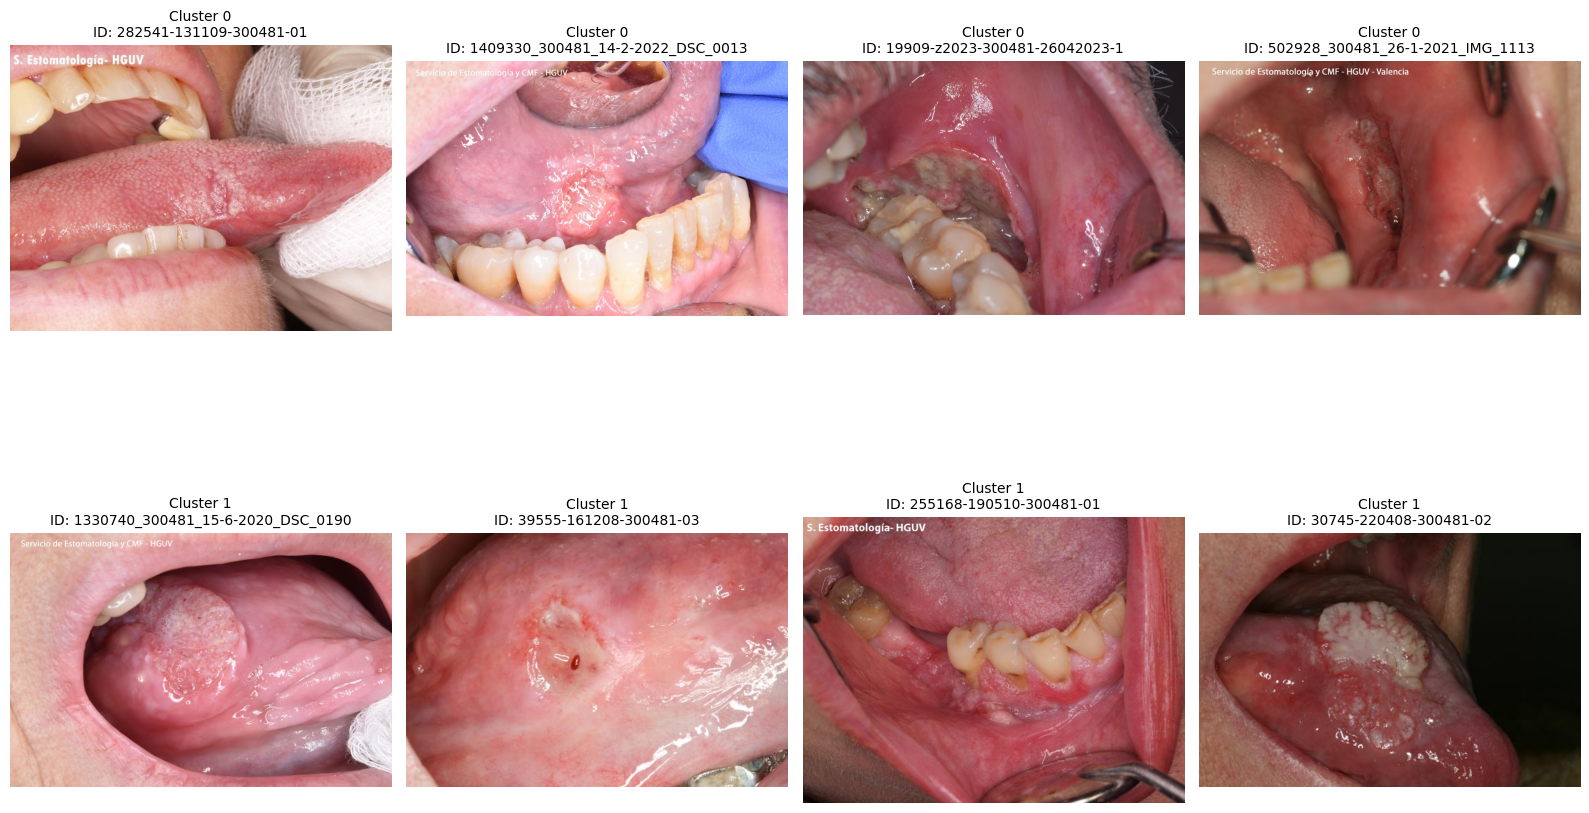

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

base_path = "/home/anna/TFM/Radiomica/Segmentacion/segmentacion_resultados"
output_dir = "/home/anna/TFM/Radiomica/Visualizaciones_KMeans"
os.makedirs(output_dir, exist_ok=True) 
image_filename = "original.jpg"
cluster_col = "Cluster"
n_imgs = 4  
random_seed = 42  

df = df_merged.copy()

if 'FolderID' not in df.columns:
    if 'Image' in df.columns:
        df['FolderID'] = df['Image']
    else:
        raise ValueError("No se encontró columna 'Image' ni 'FolderID'.")

if cluster_col not in df.columns:
    raise ValueError("El DataFrame no contiene la columna de cluster ('Cluster').")

examples = []
np.random.seed(random_seed)

for cluster in sorted(df[cluster_col].unique()):
    cluster_data = df[df[cluster_col] == cluster]
    selected = cluster_data.sample(n=n_imgs, replace=False)
    for _, row in selected.iterrows():
        examples.append((cluster, row['FolderID']))

fig, axes = plt.subplots(2, 4, figsize=(16, 12))  

for idx, (cluster, folder_id) in enumerate(examples):
    row_idx = cluster  
    col_idx = idx % 4  
    ax = axes[row_idx, col_idx]

    image_path = os.path.join(base_path, folder_id, image_filename)

    if os.path.exists(image_path):
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.set_title(f"Cluster {cluster}\nID: {folder_id}", fontsize=10)
    else:
        ax.text(0.5, 0.5, "Imagen no encontrada", ha='center', va='center')
    
    ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])

save_path = os.path.join(output_dir, "KMeans_aleatorio_2.png")
plt.savefig(save_path, dpi=300)
print(f"Figura guardada: {save_path}")

plt.show()
plt.close(fig)

Filtramos por características las características más relevantes

In [ ]:
base_path = "/home/anna/TFM/Radiomica/Segmentacion/segmentacion_resultados"
image_filename = "original.jpg"


features = ["Mean", "ClusterShade", "SmallDependenceLowGrayLevelEmphasis"]

cluster_col = "Cluster"
n_imgs = 2  

df = df_merged.copy()


if 'FolderID' not in df.columns:
    if 'Image' in df.columns:
        df['FolderID'] = df['Image']
    else:
        raise ValueError("No se encontró columna 'Image' ni 'FolderID'.")

if cluster_col not in df.columns:
    raise ValueError("El DataFrame no contiene la columna de cluster ('Cluster').")

output_dir = "/home/anna/TFM/Radiomica/Visualizaciones_KMeans"
os.makedirs(output_dir, exist_ok=True)

for feature in features:
    examples = []
    for cluster in sorted(df[cluster_col].unique()):
        cluster_data = df[df[cluster_col] == cluster]
        low = cluster_data.nsmallest(n_imgs, feature)
        high = cluster_data.nlargest(n_imgs, feature)
        selected = pd.concat([low, high])
        for _, row in selected.iterrows():
            examples.append((cluster, row[feature], row['FolderID']))

    n_clusters = len(df[cluster_col].unique())
    n_cols = n_imgs * 2 
    fig, axes = plt.subplots(n_clusters, n_cols, figsize=(4*n_cols, 4*n_clusters))

    if n_clusters == 1:
        axes = axes.reshape(1, -1)

    for idx, (cluster, val, folder_id) in enumerate(examples):
        row_idx = cluster
        col_idx = idx % (n_imgs*2)
        ax = axes[row_idx, col_idx]

        image_path = os.path.join(base_path, folder_id, image_filename)

        if os.path.exists(image_path):
            img = cv2.imread(image_path, cv2.IMREAD_COLOR)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax.imshow(img)
            ax.set_title(f"Cluster {cluster}\n{feature}: {val:.2f}", fontsize=10)
        else:
            ax.text(0.5, 0.5, "Imagen no encontrada", ha='center', va='center')

        ax.axis('off')

    plt.suptitle(f"Imágenes representativas por Cluster filtradas por {feature}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])


    save_path = os.path.join(output_dir, f"KMeans_{feature}_2.png")
    plt.savefig(save_path, dpi=300)
    plt.close(fig)
    print(f"Figura guardada: {save_path}")


Figura guardada: /home/anna/TFM/Radiomica/Visualizaciones_KMeans/KMeans_Mean_2.png
Figura guardada: /home/anna/TFM/Radiomica/Visualizaciones_KMeans/KMeans_ClusterShade_2.png
Figura guardada: /home/anna/TFM/Radiomica/Visualizaciones_KMeans/KMeans_SmallDependenceLowGrayLevelEmphasis_2.png


#### 3.2 AGGLOMERATIVE CLUSTERING 

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

df_filtered = df_prepared[df_prepared['Clinical_Type'] == 2].copy()
X = df_filtered.select_dtypes(include=['float64', 'int64']).drop(columns=['Clinical_Type'], errors='ignore')

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 2
agg_model = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_model.fit_predict(X_scaled)

df_filtered['Cluster'] = agg_labels

In [ ]:
silhouette_vals = silhouette_samples(X_scaled, agg_labels)
y_ticks = []
start = 0

plt.figure(figsize=(10,6))
for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[agg_labels == i]
    cluster_silhouette_vals.sort()
    y_lower = start
    y_upper = start + len(cluster_silhouette_vals)
    color = sns.color_palette("Set2")[i]
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, color=color, alpha=0.7)
    y_ticks.append((y_lower + y_upper) / 2)
    start = y_upper

plt.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
plt.yticks(y_ticks, [f"Cluster {i}" for i in range(n_clusters)])
plt.xlabel("Valor Silhouette")
plt.ylabel("Cluster")
plt.title("Visualización personalizada de Silhouette con Agglomerative Clustering")
plt.tight_layout()
plt.savefig("silhouette_Score_agglomerative_2.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_filtered['PCA1'] = X_pca[:, 0]
df_filtered['PCA2'] = X_pca[:, 1]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(
    data=df_filtered,
    x='PCA1',
    y='PCA2',
    hue='Clinical_Type',
    palette='tab10',
    ax=axes[0]
)
axes[0].set_title('Distribución por Clinical Type')

sns.scatterplot(
    data=df_filtered,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='Set2',
    ax=axes[1]
)
axes[1].set_title('Distribución por Clúster (Agglomerative)')

plt.tight_layout()
plt.show()
my_plot = fig  
my_plot.savefig("grafica_clinical_vs_cluster_agglomerative_2.png", dpi=300, bbox_inches="tight")


In [ ]:
import pandas as pd

df_filtered = df_filtered.drop(columns=['PCA1', 'PCA2'], errors='ignore')

cluster_means = df_filtered.groupby('Cluster').mean(numeric_only=True)
print(cluster_means.T)


In [ ]:
from scipy.stats import f_oneway

features = df_filtered.columns.drop(['Cluster', 'PCA1', 'PCA2'], errors='ignore')

clusters = df_filtered['Cluster'].unique()

print("Variables con diferencias significativas (p < 0.05):")
for feature in features:
    groups = [df_filtered[df_filtered['Cluster'] == c][feature] for c in clusters]
    stat, p = f_oneway(*groups)
    if p < 0.05:
        print(f"{feature}: p-value = {p:.6f}")


In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = df_filtered.drop(columns=['Cluster', 'PCA1', 'PCA2'], errors='ignore')
y = df_filtered['Cluster']

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled['Cluster'] = y.values

cluster_means = X_scaled.groupby('Cluster').mean()
diff = cluster_means.max() - cluster_means.min()  

top_features = diff.sort_values(ascending=False).head(10).index

print("Top características por diferencia de medias entre clusters:")
print(top_features)

df_long = X_scaled.melt(id_vars='Cluster', value_vars=top_features, var_name='Feature', value_name='Valor')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_long, x='Feature', y='Valor', hue='Cluster', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot: características con mayor diferencia entre clusters (k=3)')
plt.tight_layout()
my_plot = fig  
my_plot.savefig("grafica_boxplot_agglomerative_2.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Top 10 características por importancia:")
for i in indices[:10]:
    print(f"{X.columns[i]}: {importances[i]:.4f}")


In [ ]:
df_filtered['10Percentile_round'] = df_filtered['10Percentile'].round(5)
df_original['10Percentile_round'] = df_original['10Percentile'].round(5)

df_merged = pd.merge(df_filtered, 
                     df_original[['10Percentile_round', 'Image', 'Mask']], 
                     on='10Percentile_round', how='left')

df_merged.drop(columns='10Percentile_round', inplace=True)

df_merged['FolderID'] = df_merged['Image']

base_path = "/home/anna/TFM/Radiomica/Segmentacion/segmentacion_resultados"
image_filename = "original.jpg"
cluster_col = "Cluster"
n_imgs = 4  
random_seed = 42

df = df_merged.copy()

if 'FolderID' not in df.columns:
    if 'Image' in df.columns:
        df['FolderID'] = df['Image']
    else:
        raise ValueError("No se encontró columna 'Image' ni 'FolderID'.")

if cluster_col not in df.columns:
    raise ValueError("El DataFrame no contiene la columna de cluster ('Cluster').")

examples = []
np.random.seed(random_seed)

for cluster in sorted(df[cluster_col].unique()):
    cluster_data = df[df[cluster_col] == cluster]
    n_select = min(n_imgs, len(cluster_data))
    selected = cluster_data.sample(n=n_select, replace=False)
    for _, row in selected.iterrows():
        examples.append((cluster, row['FolderID']))


fig, axes = plt.subplots(2, 4, figsize=(16, 12))

for idx, (cluster, folder_id) in enumerate(examples):
    row_idx = cluster 
    col_idx = idx % 4  
    ax = axes[row_idx, col_idx]

    image_path = os.path.join(base_path, folder_id, image_filename)

    if os.path.exists(image_path):
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.set_title(f"Cluster {cluster}\nID: {folder_id}", fontsize=10)
    else:
        ax.text(0.5, 0.5, "Imagen no encontrada", ha='center', va='center')
    
    ax.axis('off')

plt.suptitle("Imágenes aleatorias por Cluster", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
base_path = "/home/anna/TFM/Radiomica/Segmentacion/segmentacion_resultados"
image_filename = "original.jpg"
feature = "ClusterShade"  
cluster_col = "Cluster" # Podríamos probar con otras características relevantes
n_imgs_each = 2  

df = df_merged.copy()

if 'FolderID' not in df.columns:
    if 'Image' in df.columns:
        df['FolderID'] = df['Image']
    else:
        raise ValueError("No se encontró columna 'Image' ni 'FolderID'.")

if cluster_col not in df.columns:
    raise ValueError("El DataFrame no contiene la columna de cluster ('Cluster').")

clusters = sorted(df[cluster_col].unique())
n_clusters = len(clusters)
total_imgs_per_cluster = n_imgs_each * 2 
fig, axes = plt.subplots(n_clusters, total_imgs_per_cluster, figsize=(4 * total_imgs_per_cluster, 4 * n_clusters))

examples = []
for cluster in clusters:
    cluster_data = df[df[cluster_col] == cluster]
    low = cluster_data.nsmallest(n_imgs_each, feature)
    high = cluster_data.nlargest(n_imgs_each, feature)
    selected = pd.concat([low, high])
    examples.append((cluster, selected))

for row_idx, (cluster, selected_df) in enumerate(examples):
    for col_idx in range(total_imgs_per_cluster):
        ax = axes[row_idx, col_idx] if n_clusters > 1 else axes[col_idx]
        if col_idx < len(selected_df):
            row = selected_df.iloc[col_idx]
            folder_id = row['FolderID']
            shade_val = row[feature]
            image_path = os.path.join(base_path, folder_id, image_filename)

            if os.path.exists(image_path):
                img = cv2.imread(image_path, cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                ax.imshow(img)
                ax.set_title(f"Cluster {cluster}\n{feature}: {shade_val:.2f}", fontsize=10)
            else:
                ax.text(0.5, 0.5, "Imagen no encontrada", ha='center', va='center')
        else:
            ax.axis('off')  
        ax.axis('off')

plt.suptitle(f"Imágenes representativas por Cluster ({feature} bajo y alto)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### 3.3 GMM

In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

X = df_filtered.drop(columns=['Cluster', 'PCA1', 'PCA2'], errors='ignore')  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 2
gmm = GaussianMixture(n_components=k, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

df_filtered['Cluster'] = gmm_labels


In [ ]:
silhouette_vals = silhouette_samples(X_scaled, gmm_labels)
y_ticks = []
start = 0

plt.figure(figsize=(10,6))
for i in range(k):
    cluster_silhouette_vals = silhouette_vals[gmm_labels == i]
    cluster_silhouette_vals.sort()
    y_lower = start
    y_upper = start + len(cluster_silhouette_vals)
    color = sns.color_palette("Set2")[i]
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, color=color, alpha=0.7)
    y_ticks.append((y_lower + y_upper) / 2)
    start = y_upper

plt.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
plt.yticks(y_ticks, [f"Cluster {i}" for i in range(k)])
plt.xlabel("Valor Silhouette")
plt.ylabel("Cluster")
plt.title("Visualización personalizada de Silhouette con GMM")
plt.tight_layout()
plt.savefig("silhouette_Score_gmm_2.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_filtered['PCA1'] = X_pca[:, 0]
df_filtered['PCA2'] = X_pca[:, 1]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df_filtered, x='PCA1', y='PCA2', hue='Clinical_Type', palette='tab10', ax=axes[0])
axes[0].set_title('Distribución por Clinical Type')

sns.scatterplot(data=df_filtered, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', ax=axes[1])
axes[1].set_title('Distribución por Clúster (GMM)')

plt.tight_layout()
plt.show()
my_plot = fig  
my_plot.savefig("grafica_clinical_vs_cluster_gmm_2.png", dpi=300, bbox_inches="tight")

In [ ]:
from scipy.stats import f_oneway

features = df_filtered.columns.drop(['Cluster', 'PCA1', 'PCA2'], errors='ignore')
clusters = df_filtered['Cluster'].unique()

print("Variables con diferencias significativas (p < 0.05) entre clusters GMM:")

for feature in features:
    groups = [df_filtered[df_filtered['Cluster'] == c][feature].dropna() for c in clusters]
    valid_groups = [g for g in groups if len(g) > 1]  # Grupos con al menos 2 muestras

    if len(valid_groups) >= 2:
        stat, p = f_oneway(*valid_groups)
        if p < 0.05:
            print(f"{feature}: p-value = {p:.6f}")
    else:
        print(f"{feature}: ignorado (menos de dos grupos con suficientes muestras)")


In [ ]:
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

scaler = MinMaxScaler()
X_scaled_df = pd.DataFrame(scaler.fit_transform(df_filtered[features]), columns=features)
X_scaled_df['Cluster'] = df_filtered['Cluster'].values

cluster_means = X_scaled_df.groupby('Cluster').mean()
diff = cluster_means.max() - cluster_means.min()

top_features = diff.sort_values(ascending=False).head(10).index

df_long = X_scaled_df.melt(id_vars='Cluster', value_vars=top_features, var_name='Feature', value_name='Valor')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_long, x='Feature', y='Valor', hue='Cluster', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot: características con mayor diferencia entre clusters (GMM)')
plt.tight_layout()
my_plot = fig  
my_plot.savefig("grafica_boxplot_gmm_2.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Top 10 características por importancia:")
for i in indices[:10]:
    print(f"{X.columns[i]}: {importances[i]:.4f}")


In [ ]:
df_filtered['10Percentile_round'] = df_filtered['10Percentile'].round(5)
df_original['10Percentile_round'] = df_original['10Percentile'].round(5)

df_merged = pd.merge(
    df_filtered,
    df_original[['10Percentile_round', 'Image', 'Mask']],
    on='10Percentile_round',
    how='left'
)

df_merged.drop(columns='10Percentile_round', inplace=True)

df_merged['FolderID'] = df_merged['Image']

base_path = "/home/anna/TFM/Radiomica/Segmentacion/segmentacion_resultados"
image_filename = "original.jpg"
cluster_col = "Cluster"
n_imgs = 4  
random_seed = 42

df = df_merged.copy()

if 'FolderID' not in df.columns:
    if 'Image' in df.columns:
        df['FolderID'] = df['Image']
    else:
        raise ValueError("No se encontró columna 'Image' ni 'FolderID'.")

if cluster_col not in df.columns:
    raise ValueError("El DataFrame no contiene la columna de cluster ('Cluster').")

examples = []
np.random.seed(random_seed)

for cluster in sorted(df[cluster_col].unique()):
    cluster_data = df[df[cluster_col] == cluster]
    n_select = min(n_imgs, len(cluster_data))
    selected = cluster_data.sample(n=n_select, replace=False)
    for _, row in selected.iterrows():
        examples.append((cluster, row['FolderID']))

n_clusters = len(df[cluster_col].unique())
n_cols = n_imgs
n_rows = n_clusters

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))

for idx, (cluster, folder_id) in enumerate(examples):
    row_idx = cluster
    col_idx = idx % n_cols
    ax = axes[row_idx, col_idx] if n_rows > 1 else axes[col_idx]

    image_path = os.path.join(base_path, folder_id, image_filename)

    if os.path.exists(image_path):
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.set_title(f"Cluster {cluster}\nID: {folder_id}", fontsize=10)
    else:
        ax.text(0.5, 0.5, "Imagen no encontrada", ha='center', va='center')

    ax.axis('off')

plt.suptitle("Imágenes aleatorias por Cluster (GMM)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
base_path = "/home/anna/TFM/Radiomica/Segmentacion/segmentacion_resultados"
image_filename = "original.jpg"
feature = "ClusterShade"  
cluster_col = "Cluster"  # O con otra característica relevante
n_imgs_each = 2          

df = df_merged.copy()

if 'FolderID' not in df.columns:
    if 'Image' in df.columns:
        df['FolderID'] = df['Image']
    else:
        raise ValueError("No se encontró columna 'Image' ni 'FolderID'.")

if cluster_col not in df.columns:
    raise ValueError("El DataFrame no contiene la columna de cluster ('Cluster').")

clusters = sorted(df[cluster_col].unique())
n_clusters = len(clusters)
total_imgs_per_cluster = n_imgs_each * 2

fig, axes = plt.subplots(n_clusters, total_imgs_per_cluster, figsize=(4 * total_imgs_per_cluster, 4 * n_clusters))

examples = []
for cluster in clusters:
    cluster_data = df[df[cluster_col] == cluster]
    low = cluster_data.nsmallest(n_imgs_each, feature)
    high = cluster_data.nlargest(n_imgs_each, feature)
    selected = pd.concat([low, high])
    examples.append((cluster, selected))

for row_idx, (cluster, selected_df) in enumerate(examples):
    for col_idx in range(total_imgs_per_cluster):
        ax = axes[row_idx, col_idx] if n_clusters > 1 else axes[col_idx]
        if col_idx < len(selected_df):
            row = selected_df.iloc[col_idx]
            folder_id = row['FolderID']
            shade_val = row[feature]
            image_path = os.path.join(base_path, folder_id, image_filename)

            if os.path.exists(image_path):
                img = cv2.imread(image_path, cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                ax.imshow(img)
                ax.set_title(f"Cluster {cluster}\n{feature}: {shade_val:.2f}", fontsize=10)
            else:
                ax.text(0.5, 0.5, "Imagen no encontrada", ha='center', va='center')
        else:
            ax.axis('off')
        ax.axis('off')

plt.suptitle(f"Imágenes representativas por Cluster ({feature} bajo y alto) - GMM", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### 3.4 SPECTRAL CLUSTERING

In [ ]:
from sklearn.cluster import SpectralClustering

k = 2
spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(X_scaled)

df_filtered['Cluster'] = spectral_labels


In [ ]:
silhouette_vals = silhouette_samples(X_scaled, spectral_labels)
y_ticks = []
start = 0

plt.figure(figsize=(10,6))
for i in range(k):
    cluster_silhouette_vals = silhouette_vals[spectral_labels == i]
    cluster_silhouette_vals.sort()
    y_lower = start
    y_upper = start + len(cluster_silhouette_vals)
    color = sns.color_palette("Set2")[i]
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, color=color, alpha=0.7)
    y_ticks.append((y_lower + y_upper) / 2)
    start = y_upper

plt.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
plt.yticks(y_ticks, [f"Cluster {i}" for i in range(k)])
plt.xlabel("Valor Silhouette")
plt.ylabel("Cluster")
plt.title("Visualización personalizada de Silhouette con Spectral Clustering")
plt.tight_layout()
plt.savefig("silhouette_Score_spectral_2.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_filtered['PCA1'] = X_pca[:, 0]
df_filtered['PCA2'] = X_pca[:, 1]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df_filtered, x='PCA1', y='PCA2', hue='Clinical_Type', palette='tab10', ax=axes[0])
axes[0].set_title('Distribución por Clinical Type')

sns.scatterplot(data=df_filtered, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', ax=axes[1])
axes[1].set_title('Distribución por Clúster (Spectral Clustering)')

plt.tight_layout()
plt.show()
my_plot = fig  
my_plot.savefig("grafica_clinical_vs_cluster_spectral_2.png", dpi=300, bbox_inches="tight")

In [ ]:
from scipy.stats import f_oneway

features = df_filtered.columns.drop(['Cluster', 'PCA1', 'PCA2'], errors='ignore')
clusters = df_filtered['Cluster'].unique()

print("Variables con diferencias significativas (p < 0.05):")
for feature in features:
    groups = [df_filtered[df_filtered['Cluster'] == c][feature].dropna() for c in clusters]
    if all(len(g) > 1 for g in groups):
        stat, p = f_oneway(*groups)
        if p < 0.05:
            print(f"{feature}: p-value = {p:.6f}")


In [ ]:
X_feats = df_filtered.drop(columns=['Cluster', 'PCA1', 'PCA2'], errors='ignore')
y = df_filtered['Cluster']

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_feats), columns=X_feats.columns)
X_scaled['Cluster'] = y.values

cluster_means = X_scaled.groupby('Cluster').mean()
diff = cluster_means.max() - cluster_means.min()
top_features = diff.sort_values(ascending=False).head(10).index

print("Top características por diferencia de medias entre clusters:")
print(top_features)

df_long = X_scaled.melt(id_vars='Cluster', value_vars=top_features, var_name='Feature', value_name='Valor')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_long, x='Feature', y='Valor', hue='Cluster', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot: características con mayor diferencia entre clusters (Spectral Clustering)')
plt.tight_layout()
my_plot = fig  
my_plot.savefig("grafica_boxplot_spectral_2.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Top 10 características por importancia:")
for i in indices[:10]:
    print(f"{X.columns[i]}: {importances[i]:.4f}")


In [ ]:
df_filtered['10Percentile_round'] = df_filtered['10Percentile'].round(5)
df_original['10Percentile_round'] = df_original['10Percentile'].round(5)

df_merged = pd.merge(df_filtered,
                     df_original[['10Percentile_round', 'Image', 'Mask']],
                     on='10Percentile_round', how='left')
df_merged.drop(columns='10Percentile_round', inplace=True)
df_merged['FolderID'] = df_merged['Image']

base_path = "/home/anna/TFM/Radiomica/Segmentacion/segmentacion_resultados"
image_filename = "original.jpg"
cluster_col = "Cluster" 
n_imgs = 4
random_seed = 42

df = df_merged.copy()

if 'FolderID' not in df.columns:
    if 'Image' in df.columns:
        df['FolderID'] = df['Image']
    else:
        raise ValueError("No se encontró columna 'Image' ni 'FolderID'.")

if cluster_col not in df.columns:
    raise ValueError("El DataFrame no contiene la columna de cluster ('Cluster').")

examples = []
np.random.seed(random_seed)

for cluster in sorted(df[cluster_col].unique()):
    cluster_data = df[df[cluster_col] == cluster]
    n_select = min(n_imgs, len(cluster_data))
    selected = cluster_data.sample(n=n_select, replace=False)
    for _, row in selected.iterrows():
        examples.append((cluster, row['FolderID']))

fig, axes = plt.subplots(k, n_imgs, figsize=(4 * n_imgs, 4 * k))

for idx, (cluster, folder_id) in enumerate(examples):
    row_idx = cluster
    col_idx = idx % n_imgs
    ax = axes[row_idx, col_idx]

    image_path = os.path.join(base_path, folder_id, image_filename)

    if os.path.exists(image_path):
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.set_title(f"Cluster {cluster}\nID: {folder_id}", fontsize=10)
    else:
        ax.text(0.5, 0.5, "Imagen no encontrada", ha='center', va='center')

    ax.axis('off')

plt.suptitle("Imágenes aleatorias por Cluster (Spectral Clustering)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:

base_path = "/home/anna/TFM/Radiomica/Segmentacion/segmentacion_resultados"
image_filename = "original.jpg"
feature = "ClusterShade"  # O con otra característica relevante
cluster_col = "Cluster"
n_imgs_each = 2

df = df_merged.copy()

if 'FolderID' not in df.columns:
    if 'Image' in df.columns:
        df['FolderID'] = df['Image']
    else:
        raise ValueError("No se encontró columna 'Image' ni 'FolderID'.")

if cluster_col not in df.columns:
    raise ValueError("El DataFrame no contiene la columna de cluster ('Cluster').")

clusters = sorted(df[cluster_col].unique())
n_clusters = len(clusters)
total_imgs_per_cluster = n_imgs_each * 2
fig, axes = plt.subplots(n_clusters, total_imgs_per_cluster, figsize=(4 * total_imgs_per_cluster, 4 * n_clusters))

examples = []
for cluster in clusters:
    cluster_data = df[df[cluster_col] == cluster]
    low = cluster_data.nsmallest(n_imgs_each, feature)
    high = cluster_data.nlargest(n_imgs_each, feature)
    selected = pd.concat([low, high])
    examples.append((cluster, selected))

for row_idx, (cluster, selected_df) in enumerate(examples):
    for col_idx in range(total_imgs_per_cluster):
        ax = axes[row_idx, col_idx] if n_clusters > 1 else axes[col_idx]
        if col_idx < len(selected_df):
            row = selected_df.iloc[col_idx]
            folder_id = row['FolderID']
            shade_val = row[feature]
            image_path = os.path.join(base_path, folder_id, image_filename)

            if os.path.exists(image_path):
                img = cv2.imread(image_path, cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                ax.imshow(img)
                ax.set_title(f"Cluster {cluster}\n{feature}: {shade_val:.2f}", fontsize=10)
            else:
                ax.text(0.5, 0.5, "Imagen no encontrada", ha='center', va='center')
        else:
            ax.axis('off')
        ax.axis('off')

plt.suptitle(f"Imágenes representativas por Cluster ({feature} bajo y alto) - Spectral Clustering", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 4. INTERPRETACIÓN DE LAS CARACTERÍSTICAS

#  Interpretación práctica de las características radiómicas significativas

Tras aplicar un análisis de clustering (*k=3*) sobre las características radiómicas de los pacientes con `Clinical_Type = 2`, se identificaron múltiples **variables con diferencias estadísticamente significativas** (`p < 0.05`) entre los grupos.

A continuación se presenta la **interpretación clínica** de las características más relevantes, agrupadas por categoría:


## Primer orden – Estadísticas de intensidad

Estas características se basan en los valores de intensidad de píxel o vóxel dentro de la **Región de Interés (ROI)**.

### ▪️ Mean, Minimum, Maximum, Range, 90Percentile, 10Percentile, RootMeanSquared
- **Significado**: Representan valores de intensidad y su distribución.
- **Interpretación clínica**:
  - Valores altos pueden sugerir **tejidos hiperdensos** (ej. calcificaciones, contraste).
  - Valores bajos pueden reflejar **zonas hipodensas** (ej. necrosis, grasa, quistes).
  - `Range` refleja la **heterogeneidad global**.
  - `RootMeanSquared` se relaciona con la **energía de la señal**.


## Distribución – Forma y simetría

### ▪️ Skewness (Asimetría)
- Mide si la distribución está sesgada a la izquierda o derecha.
- Un valor alto indica **asimetría en la intensidad**, con predominio de valores extremos.

### ▪️ Kurtosis
- Mide si la distribución tiene colas pesadas o ligeras.
- Valores altos indican una distribución más "picuda", lo cual puede estar asociado a **tejidos homogéneos o bordes marcados**.

### ▪️ Entropy
- Mide la aleatoriedad o incertidumbre.
- Alto valor = **mayor heterogeneidad** → Puede estar asociado a tumores agresivos, mixtos o con necrosis.



## Forma – Morfometría y geometría

### ▪️ Sphericity
- Evalúa cuán **esférica** es la lesión.
- Alta esfericidad puede sugerir **bordes bien definidos** (potencialmente benigno), mientras que baja esfericidad puede indicar **crecimiento infiltrante**.

### ▪️ MajorAxisLength
- Longitud del eje mayor de la elipse ajustada a la ROI.
- Indica el **tamaño o elongación** de la lesión.

### ▪️ PerimeterSurfaceRatio
- Relación entre perímetro y superficie.
- Elevado cuando hay formas **irregulares o espiculadas**.

### ▪️ Elongation
- Mide cuán alargada es la forma.
- Puede ser útil para diferenciar **lesiones esféricas vs. elongadas o invasivas**.


## Textura – GLCM (Gray Level Co-occurrence Matrix)

Características que miden **patrones de intensidad de pares de píxeles vecinos**.

### ▪️ ClusterShade, ClusterProminence
- Reflejan **asimetría** y **prominencia** en los patrones de textura.
- Altos valores = **estructuras complejas o bordes abruptos**, como calcificaciones.

### ▪️ Contrast
- Diferencias de intensidad local.
- Alto contraste = **bordes marcados o estructuras internas complejas**.

### ▪️ Correlation
- Evalúa cuán correlacionados están los valores de intensidad entre píxeles vecinos.
- Valores altos → **estructura más organizada**; bajos → **ruido o heterogeneidad**.

### ▪️ Imc2 (Information Measure of Correlation 2)
- Mide la complejidad estructural.
- Alto valor → mayor **orden y regularidad**.


## Textura – GLSZM (Gray Level Size Zone Matrix)

Estas características miden **zonas conectadas de voxels con la misma intensidad**.

### ▪️ HighGrayLevelZoneEmphasis
- Zonas grandes de **alta intensidad**.
- Refleja estructuras hiperdensas (ej. calcio, hueso, contraste).

### ▪️ LargeAreaEmphasis
- Resalta zonas grandes sin importar el nivel de gris.
- Valores altos = **lesiones grandes y homogéneas**.

### ▪️ LargeAreaHighGrayLevelEmphasis / LargeAreaLowGrayLevelEmphasis
- Zonas grandes con **alta o baja intensidad**, respectivamente.
- Alta intensidad puede ser contraste o fibrosis, baja puede indicar necrosis.

### ▪️ SizeZoneNonUniformityNormalized
- Uniformidad del tamaño de las zonas.
- Valores bajos → mayor **homogeneidad** de las zonas.

### ▪️ ZoneEntropy
- Similar a `Entropy` pero aplicado a las zonas.
- Alto valor = **alta complejidad y heterogeneidad espacial**.


## Textura – GLRLM (Gray Level Run Length Matrix)

### ▪️ GrayLevelNonUniformity / GrayLevelNonUniformityNormalized
- Miden la **variación de intensidades** dentro de la imagen.
- Valores bajos indican **homogeneidad de tonos de gris**.

### ▪️ HighGrayLevelRunEmphasis
- Secuencias largas de valores altos.
- Valores altos = **presencia sostenida de estructuras hiperdensas**.


## Textura – NGTDM (Neighbouring Gray Tone Difference Matrix)

### ▪️ Busyness
- Mide la **variación rápida de intensidades** entre un voxel y sus vecinos.
- Alto → estructuras **texturizadas o irregulares**.

### ▪️ Coarseness
- Inverso a `Busyness`.
- Alto valor = **textura más uniforme y suave**.


## Textura – GLDM (Gray Level Dependence Matrix)

### ▪️ SmallDependenceHighGrayLevelEmphasis / SmallDependenceLowGrayLevelEmphasis
- Zonas pequeñas con **alta o baja intensidad**, respectivamente.
- Alta en lesiones **heterogéneas** con regiones brillantes u oscuras pequeñas.
